In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
ents = [0.0, 0.01, 0.05, 0.1, 0.4, 0.8]
clips = [0.005, 0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

In [3]:
def heatmap(returns, ents, clips):
    print("Heatmap")
    plt.figure(figsize=(8, 6))
    heats = np.mean(returns, axis=0)[:, :, -1]
    assert heats.shape == (1, 1)
    sns.heatmap(heats[::-1, ::-1], annot=True, fmt='.2f', linewidths=2, yticklabels=ents[::-1], xticklabels=clips[::-1], cmap="Blues_r")
    plt.xlabel("Eps.")
    plt.ylabel("Ent. bonus")
    plt.show()
    

def plot_returns(env_name, ents, clips, std_scale=0.1, y_max=None, tick=10):
    with open(f"./shared/{env_name}_epochsx5.npy", 'rb') as f:
        returns_x5 = np.load(f)
    with open(f"./shared/{env_name}_epochsx5_exps.npy", 'rb') as f:
        exps_x5 = np.load(f)
        
    assert len(returns_x5.shape) == 4  # (n_seeds, n_ent, n_clip, n_exp)
    assert returns_x5.shape[1:3] == (1, 1)
    print("Shape_x5:", returns_x5.shape)
    print("Max_x5:", np.max(np.mean(returns_x5, axis=0)))
    
    with open(f"./shared/{env_name}.npy", 'rb') as f:
        returns_x1 = np.load(f)
    with open(f"./shared/{env_name}_exps.npy", 'rb') as f:
        exps_x1 = np.load(f)
            
    plt.figure(figsize=(16, 8))
    
    plt.subplot(1, 2, 1)
    data_x1 = pd.DataFrame(returns_x1[:, 1, 2, :], index=["Epochsx1"]*returns_x1.shape[0], columns=exps_x1)
    data_x5 = pd.DataFrame(returns_x5[:, 0, 0, :], index=["Epochsx5"]*returns_x5.shape[0], columns=exps_x5)
    data = pd.concat([data_x1, data_x5], axis=0)
        
    plt.title(f"Returns")
    ax = sns.lineplot(data.T, errorbar=("sd", std_scale))
    plt.xlabel("Experience")
    plt.ylabel("Return")
    ax.yaxis.set_major_locator(plticker.MultipleLocator(base=tick))
    plt.ylim(top=y_max)
            
#     heatmap(returns, ents, clips)
    
    return returns_x1, returns_x5

## 1. Acrobot

Shape_x5: (8, 1, 1, 50)
Max_x5: -76.90625


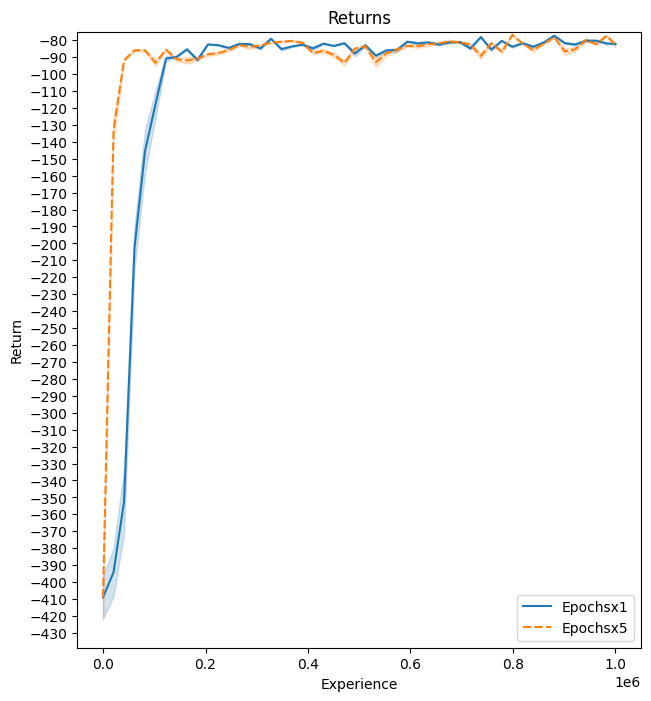

In [4]:
returns = plot_returns("Acrobot-v1", ents, clips, y_max=-75)

## 2. Asterix

Shape_x5: (8, 1, 1, 63)
Max_x5: 6.2578125


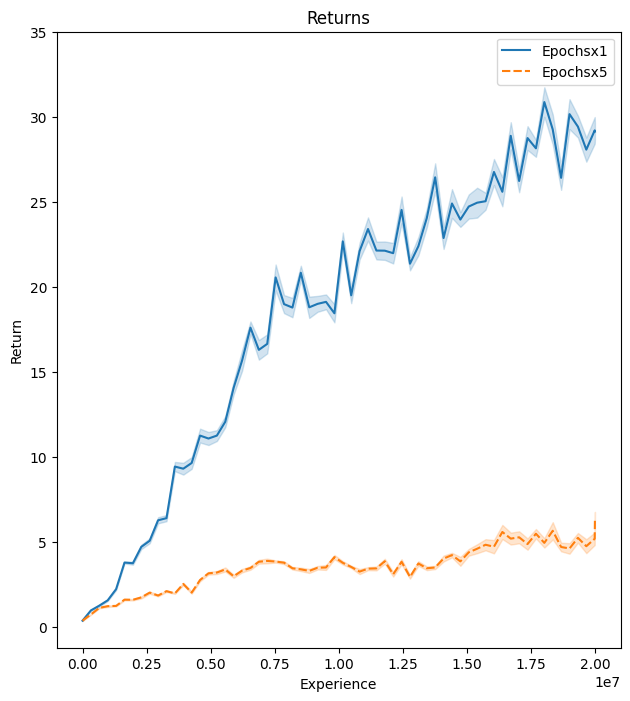

In [5]:
returns = plot_returns("Asterix-MinAtar", ents, clips, y_max=35, tick=5)

## 3. Breakout

Shape_x5: (8, 1, 1, 63)
Max_x5: 55.445312


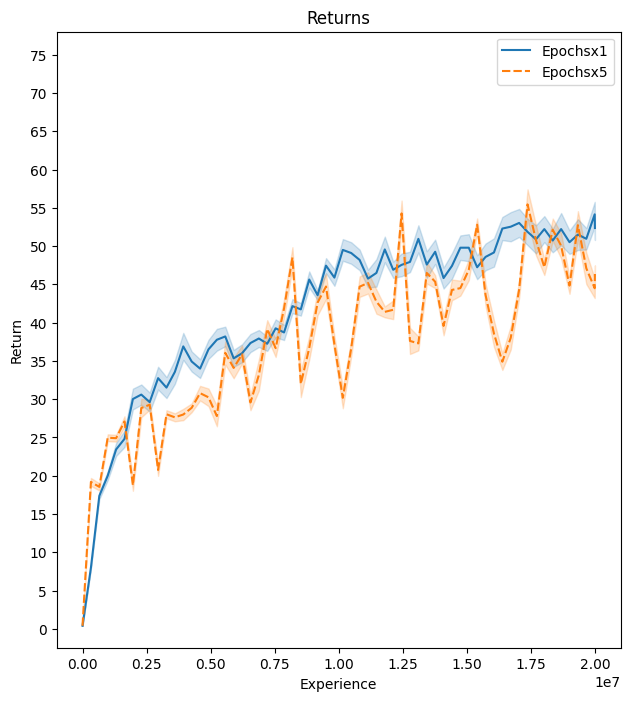

In [6]:
returns = plot_returns("Breakout-MinAtar", ents, clips, y_max=78, tick=5)

## 4. CartPole

Shape_x5: (8, 1, 1, 31)
Max_x5: 500.0


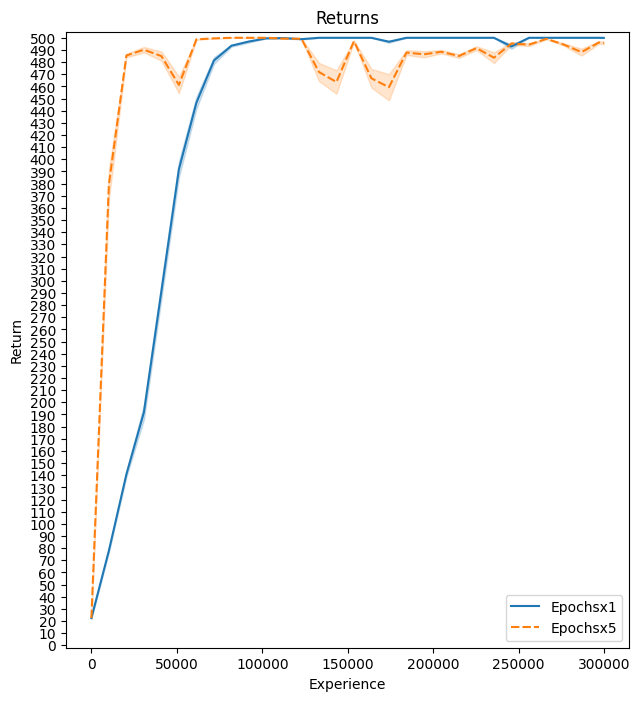

In [7]:
returns = plot_returns("CartPole-v1", ents, clips, y_max=505)

## 5. Freeway

Shape_x5: (8, 1, 1, 63)
Max_x5: 32.796875


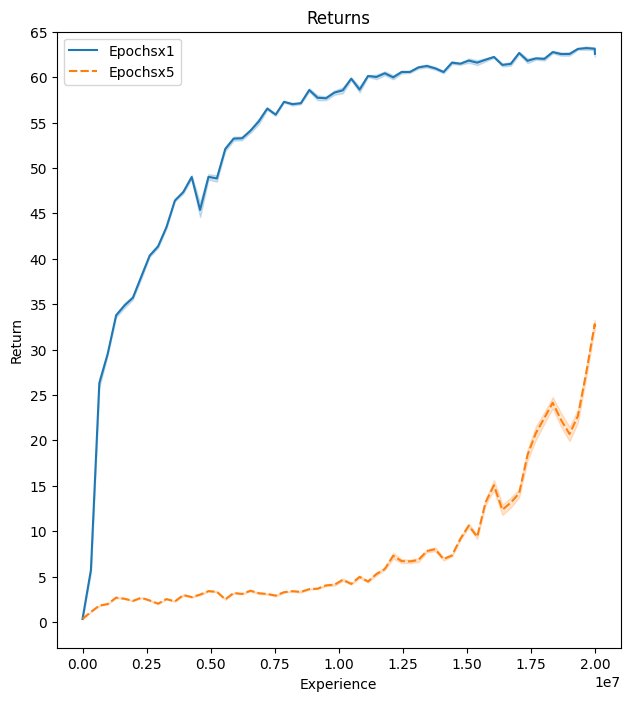

In [8]:
returns = plot_returns("Freeway-MinAtar", ents, clips, y_max=65, tick=5)

## 6. MountainCar

Shape_x5: (8, 1, 1, 26)
Max_x5: -148.8828125


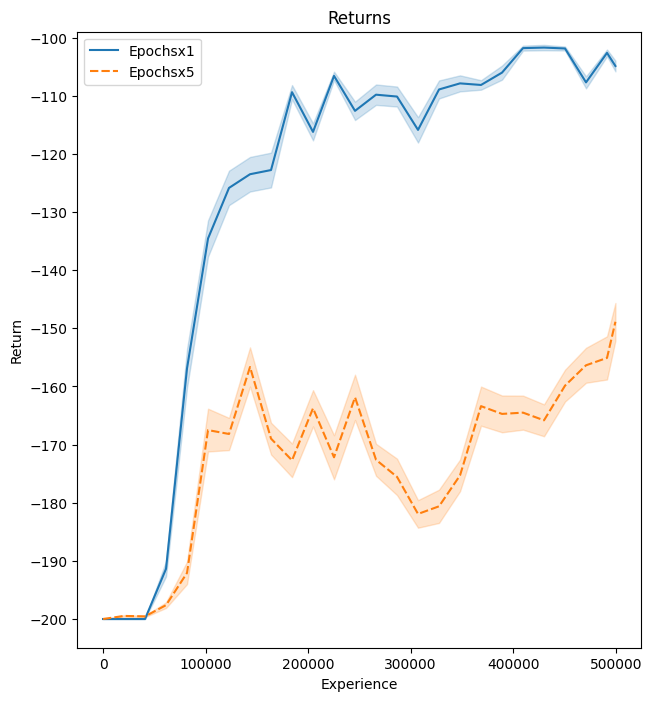

In [9]:
returns = plot_returns("MountainCar-v0", ents, clips, y_max=-99)

## 7. SpaceInvaders

Shape_x5: (8, 1, 1, 63)
Max_x5: 111.21094


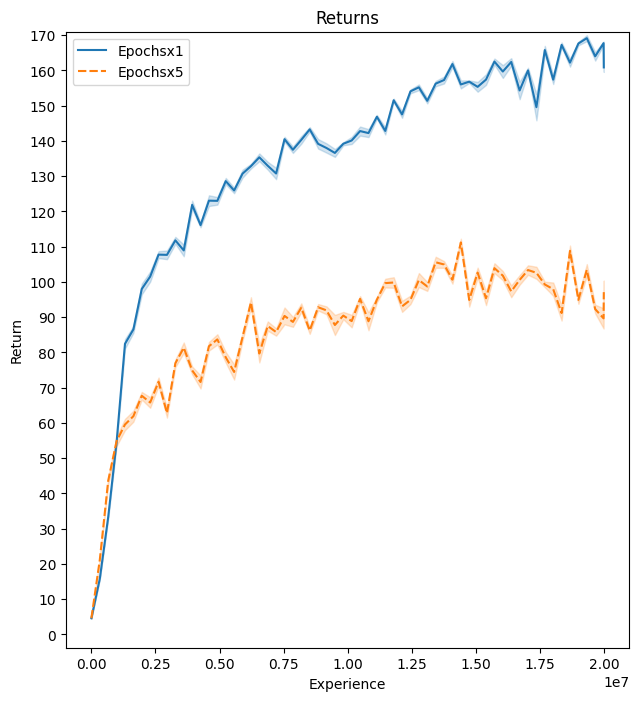

In [10]:
returns = plot_returns("SpaceInvaders-MinAtar", ents, clips, y_max=171)